# Dinosaur Project

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# Inital Data Exploration & Cleaning
A high level walk though of the dataset's contents and cleaning.

## Exploration

In [2]:
#read in data 
df = pd.read_csv('dinosaur.csv') 
df

,Name,Period,Diet,Country
0,Aardonyx,Jurassic,herbivore,South Africa
1,Abelisaurus,Cretaceous,carnivore,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa
3,Abrosaurus,Jurassic,herbivore,China
4,Abydosaurus,Cretaceous,herbivore,North America
...,...,...,...,...
1149,Zizhongosaurus,Jurassic,herbivore,China
1150,Zuniceratops,Cretaceous,herbivore,North America
1151,Zuolong,Jurassic,carnivore,China
1152,Zupaysaurus,Triassic,carnivore,South America


In [3]:
#nan value check
df.isna().sum()

Name       0
Period     0
Diet       0
Country    0
dtype: int64

In [4]:
#unique values in each column count
print('Number of unique values in the Name Column: ', df['Name'].nunique()) 
print('Number of unique values in the Period Column: ', 
      df['Period'].nunique()) 
print('Number of unique values in the Diet Column: ', df['Diet'].nunique()) 
print('Number of unique values in the Country Column: ', 
      df['Country'].nunique())

Number of unique values in the Name Column:  1143
Number of unique values in the Period Column:  14
Number of unique values in the Diet Column:  16
Number of unique values in the Country Column:  104


In [5]:
df['Period'].unique().tolist()

['Jurassic',
 'Cretaceous\xa0\xa0\xa0\xa0\xa0\xa0\xa0',
 'Cretaceous',
 'Triassic',
 'Jurassic/Cretaceous',
 'Late Triassic',
 'Late Cretaceous',
 'Triassic or Jurassic',
 'Middle Jurassic',
 'Early Cretaceous',
 'Early-Late Cretaceous',
 'Early Jurassic',
 'Triassic/Jurassic',
 '(unknown)']

In [6]:
df['Diet'].unique().tolist()

['herbivore',
 'carnivore',
 'carnivore/insectivore',
 '(herbivore)',
 'omnivore',
 'herbivore/omnivore',
 '(unknown)',
 '(carnivore)',
 'unknown',
 'Carnivore',
 'omnivorous',
 '?',
 'Herbivore',
 'carnivore/omnivore',
 'carnivore?',
 'insectivore']

In [7]:
df['Country'].unique().tolist()

['South Africa',
 'South America',
 'China',
 'North America',
 'England',
 'Mongolia',
 'Morocco',
 'Spain',
 'Egypt, Niger',
 'France',
 'South Africa, Lesotho, Zimbabwe',
 'Niger',
 'Hungary',
 'Japan',
 'Mongolia (& China?)',
 'Tanzania, USA, & Portugal',
 'Portugal, USA, & Tanzania',
 'Portugal',
 'India',
 'Russia & China',
 'Angola',
 'Antarctica',
 'Kazakhstan',
 'Madagascar',
 'Germany',
 'Russia',
 'Mongolia & China',
 'China & Mongolia',
 'Australia',
 'China & South Korea',
 'Tanzania',
 'Egypt,Niger, Morocco, Algeria',
 'Romania',
 'Pakistan',
 'Spain, Portugal, England',
 'Netherlands',
 'Uzbekistan',
 'Czech Republic',
 'Egypt, Niger, Algeria, Morocco',
 'Portugal & USA',
 'England, France, Switzerland, Morocco',
 'China, Russia, & Mongolia(?)',
 'Algeria',
 'USA, South Africa, & Zimbabwe',
 'Germany & France',
 'Belgium',
 'England, France, Spain, Portugal',
 'South Korea',
 'Morocco, Algeria, Egypt',
 'Denmark',
 'Portugal & Uzbekistan',
 'South Africa, Zimbabwe, Lesot

The data set contains: 
* 1154 rows 
* 4 columns - 'Name', 'Period', 'Diet', 'Country' 
* Name is a unique identifier that does not repeat 
* Period is a categorical column that contains either delineations within either the Jurassic, Cretaceous or Triassic Periods 
* Diet is a categorical column containing either herbivore, carnivore, omnivore, insectivore
* Country contains a mixture of countries, continents and text data. Further examination is needed.

No nan values, but unknown values, ? or duplicate but differently formatted data that will need to be identified and cleaned

## Cleaning 

In [8]:
#fix period column 
df['Period'] = df['Period'].replace('Cretaceous\xa0\xa0\xa0\xa0\xa0\xa0\xa0',
                                    'Cretaceous') 

#identified through external research 
df['Period'] = df['Period'].replace('(unknown)',
                                    'Middle Jurassic')

In [9]:
df['Period'].unique().tolist()

['Jurassic',
 'Cretaceous',
 'Triassic',
 'Jurassic/Cretaceous',
 'Late Triassic',
 'Late Cretaceous',
 'Triassic or Jurassic',
 'Middle Jurassic',
 'Early Cretaceous',
 'Early-Late Cretaceous',
 'Early Jurassic',
 'Triassic/Jurassic']

In [10]:
#fix diet column 
df['Diet'] = df['Diet'].astype(str).apply(lambda x: x.strip('(')
                                          .strip(')').lower()) 

Both dinosaurs listed in the dataset with a diet of ? have very little information (singular skeleton) and have been reclassified, both are believed to be carnivores, for this project I will classify them as such. 

In [11]:
#identified through external research 
df['Diet'] = df['Diet'].replace('?', 'carnivore').replace('carnivore?',
                                                          'carnivore')

In [12]:
#Lihkoelesauus - this is apparently an unconfirmed dinosaur so I will drop it
df = df.drop([596], axis=0)

In [13]:
#externally researched classifications 
herbivores = [138, 237] 
carnivores = [395, 593, 916, 1036]
insectivore= [1108, 1143] 

for dinosaur in herbivores: 
    df.loc[dinosaur, 'Diet'] = 'herbivore'  
    
for dinosaur in carnivores: 
    df.loc[dinosaur, 'Diet'] = 'carnivore'  
    
    
for dinosaur in insectivore: 
    df.loc[dinosaur, 'Diet'] = 'insectivore' 

Finally I will reformat omnivorous to omnivore and generalize the categories if a dinosaur is both a herbivore and an omnivore then it is more generally able to be classified as an omnivore.

In [14]:
#identified through external research 
df['Diet'] = df['Diet'].replace('omnivorous', 
                                'omnivore').replace('carnivore/insectivore',
                                                   'carnivore') 
df['Diet'] = df['Diet'].replace('herbivore/omnivore', 
                                'omnivore').replace('carnivore/omnivore',
                                                   'carnivore')

The country column is a very messy column with a lot of multi country listings, unknowns, text data and continents. I think the best approach is to create a new feature of continents.

In [15]:
#replace text data with externally researched country  
chinese_dinos= ['Formerly referred to Phaedrolosaurus.', 
                'A sauropod with an unusually long neck.', 'A troodontid.', 
                'A basal sauropodomorph.', 
                'It was once thought to walk on four legs. This is now unlikely.',  
                'A basal ceratopsian.', 'Probably a sauropod.', 
                 'A large basal sauropodomorph.',
                'The only anchiornithid to live in the Cretaceous.', 
                'This name was a nomen nudum for eight years and was only formally described in 2018.', 
                'A very large sauropod.', 'A mamenchisaurid sauropod.', 
                'Probably a relative of Jeholosaurus.', 
                'A small oviraptorosaur.', 'A hadrosauroid.',
                'Possibly a titanosaur.'] 

for dinosaur in chinese_dinos: 
    df['Country'] = df['Country'].replace(dinosaur, 'China') 

In [16]:
#grouped list of countries by continent
asia=['China', 'Mongolia', 'Japan', 'Mongolia (& China?)', 'India', 
      'Russia & China', 'Kazakhstan',  'Russia', 'Mongolia & China', 
      'China & Mongolia', 'China & South Korea', 
      'China, Russia, & Mongolia(?)', 'South Korea', 'Kyrgyzstan', 
      'Mongolia & Uzbekistan', 'Thailand', 'Korea', 
      'China, Mongolia & Thailand', 'China & Laos', 
      'China, Mongolia, Thailand (?), & Russia', 'Mongolia (& China\xa0?)',]
africa=['South Africa', 'Morocco', 'Egypt, Niger', 
        'South Africa, Lesotho, Zimbabwe', 'Niger', 'Angola', 'Madagascar', 
       'Tanzania', 'Egypt,Niger, Morocco, Algeria', 
        'Egypt, Niger, Algeria, Morocco', 'Algeria', 
        'Morocco, Algeria, Egypt', 'South Africa, Zimbabwe, Lesotho', 
        'Lesotho', 'Laos', 'Egypt', 'Malawi',  'Morocco, Niger & Tunisia', 
        'Egypt & Morocco', 'Tunisia', 'Zimbabwe']
europe=['England', 'Spain', 'France', 'Portugal', 'Hungary', 'Germany',
        'Romania', 'Spain, Portugal, England', 'Netherlands', 'Pakistan', 
        'Uzbekistan', 'Czech Republic', 'Germany & France', 'Belgium', 
        'England, France, Spain, Portugal', 'Denmark',
        'Portugal & Uzbekistan', 'England, France', 'England and France', 
        'Belgium, England, Germany', 
        'England, France, Austria, Romania, Belgium', 'Austria', 
        'Netherlands, Belgium', 'England & Portugal', 'Portugal, Spain', 
        'Spain, Portugal', 'Poland', 'Croatia', 
        'Germany, France, Switzerland, Norway, & Greenland', 
        'France, Czech Republic, Romania, Spain', 
        'Austria, Romania, France, Hungary', 'Italy', 
        'Austria, France, Romania, Hungary'] 
cross_continental=['Tanzania, USA, & Portugal', 'Portugal, USA, & Tanzania', 
                   'Portugal & USA', 'England, France, Switzerland, Morocco',
                   'USA, South Africa, & Zimbabwe', 
                   'South Africa & China (?)',
                   'England, Belgium, USA, France, Mongolia & Spain', 
                   'Mongolia & Canada',  'Mongolia, USA, Canada & China']

In [17]:
#transopose country into continent to allow for less grouping 
df['Continent'] = df['Country']

df.loc[df['Continent'].isin(asia), 'Continent'] = 'Asia' 
df.loc[df['Continent'].isin(africa), 'Continent'] = 'Africa'
df.loc[df['Continent'].isin(europe), 'Continent'] = 'Europe'
df.loc[df['Continent'].isin(cross_continental),
       'Continent'] = 'Multiple Continents'

df['Continent'].unique().tolist()

['Africa',
 'South America',
 'Asia',
 'North America',
 'Europe',
 'Multiple Continents',
 'Antarctica',
 'Australia']

In [18]:
df['Period'].unique().tolist()

['Jurassic',
 'Cretaceous',
 'Triassic',
 'Jurassic/Cretaceous',
 'Late Triassic',
 'Late Cretaceous',
 'Triassic or Jurassic',
 'Middle Jurassic',
 'Early Cretaceous',
 'Early-Late Cretaceous',
 'Early Jurassic',
 'Triassic/Jurassic']

# EDA  
Identification of trends and data distribution within the dataset.

## Question 1: What are the patterns of distribution for Period type within the data?

In [19]:
df.groupby('Continent').count()

,Name,Period,Diet,Country
Continent,,,,
Africa,85,85,85,85
Antarctica,6,6,6,6
Asia,404,404,404,404
Australia,23,23,23,23
Europe,200,200,200,200
Multiple Continents,12,12,12,12
North America,274,274,274,274
South America,149,149,149,149


In [20]:
df.loc[df['Continent'] == 'Asia'].groupby('Country').count()

,Name,Period,Diet,Continent
Country,,,,
China,235,235,235,235
China & Laos,1,1,1,1
China & Mongolia,2,2,2,2
China & South Korea,1,1,1,1
"China, Mongolia & Thailand",1,1,1,1
"China, Mongolia, Thailand (?), & Russia",1,1,1,1
"China, Russia, & Mongolia(?)",1,1,1,1
India,25,25,25,25
Japan,12,12,12,12


Asia is largely over represented within this dataset with the vast majority of those from China. While there has been major excavation work in China, leading to a so called ['dinosaur boom'](https://www.smithsonianmag.com/science-nature/great-chinese-dino-boom-180968745/) this is probably an indication of class imbalance within the dataset rather than a true representation of the distribution of dinosaurs.

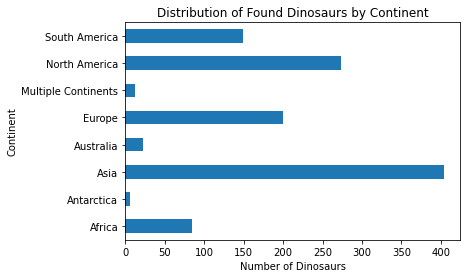

In [21]:
#grap distribution
df.groupby('Continent').Name.count().plot.barh() 
plt.title('Distribution of Found Dinosaurs by Continent') 
plt.xlabel('Number of Dinosaurs')
plt.show()

In [22]:
df.groupby(['Period', 'Continent']).count()

Name  Diet  Country
Period                Continent                               
Cretaceous            Africa                 30    30       30
                      Asia                  279   279      279
                      Australia               1     1        1
                      Europe                123   123      123
                      Multiple Continents     3     3        3
                      North America         211   211      211
                      South America         117   117      117
Early Cretaceous      Australia              16    16       16
Early Jurassic        Antarctica              2     2        2
                      Asia                    5     5        5
Early-Late Cretaceous Australia               1     1        1
Jurassic              Africa                 37    37       37
                      Asia                   95    95       95
                      Europe                 57    57       57
                      Multiple Continents     9     9        9
                      North America          53    53       53
                      South America          14    14       14
Jurassic/Cretaceous   Africa                  1     1        1
                      Asia                    2     2        2
                      Europe                  3     3        3
                      North America           1     1        1
Late Cretaceous       Africa                  6     6        6
                      Antarctica              4     4        4
                      Asia                   17    17       17
                      Australia               3     3        3
Late Triassic         Asia                    3     3        3
Middle Jurassic       Africa                  2     2        2
                      Asia                    1     1        1
                      Australia               2     2        2
Triassic              Africa                  7     7        7
                      Asia                    1     1        1
                      Europe                 16    16       16
                      North America           8     8        8
                      South America          17    17       17
Triassic or Jurassic  Africa                  2     2        2
                      South America           1     1        1
Triassic/Jurassic     Asia                    1     1        1
                      Europe                  1     1        1
                      North America           1     1        1

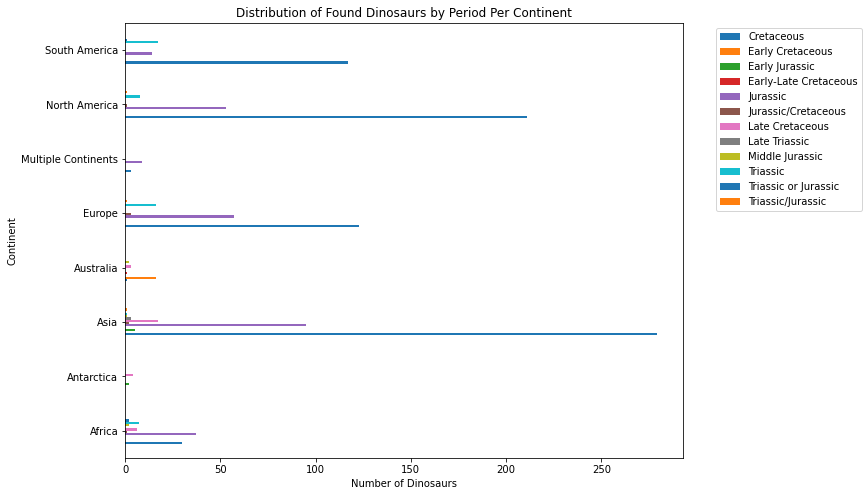

In [23]:
#grap distribution  
df.groupby(['Period']).Continent.value_counts().unstack(0) \
                                                .plot.barh(figsize = (10,8)) 
plt.title('Distribution of Found Dinosaurs by Period Per Continent')  
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Number of Dinosaurs') 
plt.show()

The majority of dinosaurs found in Asia (which represents the majority of dinosaurs in our dataset) are from the Cretaceous period. The least represented dinosaurs across continents comes from the the Triassic period with 16 and 17 dinosaurs found in Europe and Asia respectively during this time. The Triassic is the earliest period to in difficulties in finding fossils this old as well perhaps that a less diverse range of dinosaurs were present globally during their initial rise to dominance. 

## Question 2: What are the patterns of distribution for Diet type within the data?

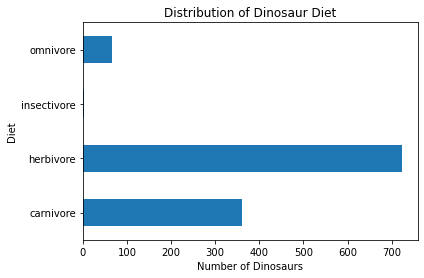

In [24]:
#grap distribution
df.groupby('Diet').Name.count().plot.barh() 
plt.title('Distribution of Dinosaur Diet') 
plt.xlabel('Number of Dinosaurs')
plt.show()

The vast majority, double the other dietary options combined!

In [25]:
#diet in asia 
df.loc[df['Continent'] == 'Asia'].groupby('Diet').count()

,Name,Period,Country,Continent
Diet,,,,
carnivore,121,121,121,121
herbivore,237,237,237,237
insectivore,2,2,2,2
omnivore,44,44,44,44


That huge percentage of herbivores is represented primarily in Asia which accounts for 237 of the total count! 

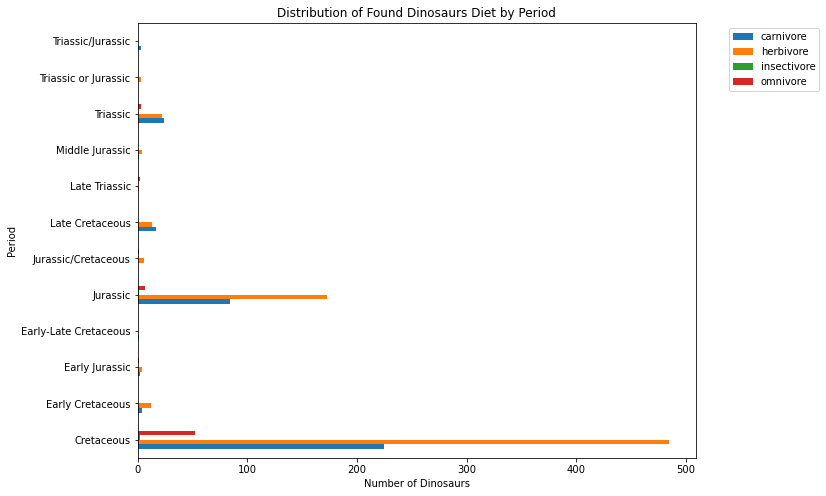

In [26]:
#diet by period
df.groupby(['Diet']).Period.value_counts().unstack(0) \
                                                .plot.barh(figsize = (10,8)) 
plt.title('Distribution of Found Dinosaurs Diet by Period')  
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Number of Dinosaurs') 
plt.show()

The vast majority of the herbivores are from the Cretaceous period dinosaurs discovered in Asia, however there is a larger number of herbivores than carnivores in the Jurassic time period as well. 

# Webscrapping 
Use Beautiful Soup to collect commonly used taxonomic affixes from Wikipedia

In [80]:
from bs4 import BeautifulSoup 
import requests   
from time import sleep 

In [155]:
#scrap the affix and the general description from page
page = requests.get('https://en.wikipedia.org/wiki/List_of_commonly_used_taxonomic_affixes')  
soup = BeautifulSoup(page.text, 'html.parser') 
affix = soup.find_all('b')    
description = soup.find_all('li')  

In [174]:
#create a list of descriptions
about = []
for d in description: 
    about.append(d.text.split('<li><b>')) 

#reassign to only affixes 
about = about[2:109]

In [183]:
#create a list of descriptions
aff = []
for a in affix: 
    aff.append(a.text) 

#reassign to only affixes 
aff = aff[2:109]

In [193]:
#create a dataframe of both the affix and the description
af = pd.DataFrame(about, aff, columns=['Description']).reset_index()
af = af.rename(columns={'index': 'Affix'}) 
af

,Affix,Description
0,an-,"a-, an-: Pronunciation: /ə/, /a/, /ən/, /an/. ..."
1,-acanth,"-acanth, acantho-, -cantho: Pronunciation: /eɪ..."
2,"acantho-, -cantho","amphi-: Pronunciation: /amfiː/, /amfɪ/. Origin..."
3,amphi-,"-anthus, antho-: Pronunciation: /anθəs/, /anθo..."
4,-anthus,"arch-, archi-, archo-, -archus: Pronunciation:..."
...,...,...
102,-noto-,"-urus, -uro-: Pronunciation: /uːrəs/, /uːroʊ/...."
103,-nych,veloci-: Pronunciation: /vəlɑsɪ/. Origin: Lati...
104,"nycho-, -nyx",-venator: Pronunciation: /vɛnətər/. Origin: La...
105,"-onych, onycho-, -onyx",xeno-: Pronunciation: /zinoʊ/. Origin: Ancient...


# Pattern Recognition  
Use regex to identify patterns in dinosaur names to classify dinosaur genus. 

The vast array of names given to dinosaurs can often be over whelming for a novice enthusiast to digest. Using text recognition of commonly implemented name endings, a classifier could identify to a general extent a dinosaurs grouping. For example any dinosaur with the name ending 'ceratops' should fall into the Ceratopsid family.

In [31]:
import re

In [219]:
cleaned_aff = []
for a in aff: 
    a.strip('-').strip(',') 
    cleaned_aff.append(a)

In [226]:
aff[1].strip('-').strip('-').strip(',') 

'acanth'

In [ ]:
"""CREATE A COMMA SEPERATED STRING"""

In [218]:
aff

['an-',
 '-acanth',
 'acantho-, -cantho',
 'amphi-',
 '-anthus',
 'antho-',
 'arch-',
 'archi-',
 'archo-',
 '-archus',
 'archaeo-',
 '-arctos',
 'arcto-',
 'arthro-',
 'aspido-, -aspis',
 '-avis',
 '-bates',
 'brachi-',
 'brachy-',
 'bronto-',
 '-canth',
 'cantho-',
 '-acanth, acantho-',
 'carcharo-',
 '-cephalus',
 'cephalo-',
 '-cephale',
 '-cephalian',
 '-ceras',
 'cerat-, -ceratus',
 'cetio-',
 '-cetus',
 '-cheirus',
 'chloro-',
 'coel-',
 'cyan-',
 'cyano-',
 'cyclo-',
 'cyn-',
 '-cyon',
 '-dactyl',
 '-dactylus',
 '-deres',
 '-derm',
 'deino-',
 'dino-',
 'deino-',
 '-delphys, -delphis, delpho-',
 'dendro-',
 '-dendron',
 '-dendrum',
 'di-',
 'dino-',
 'deino-',
 'diplo-',
 '-don',
 '-dont',
 'donto-',
 '-odon',
 '-odont',
 '-odonto-',
 'dromaeo-',
 'dromeo-',
 '-dromeus',
 'eo-',
 '-erpeton',
 'eu-',
 '-felis',
 '-form',
 '-formes',
 'giga-',
 'giganto-',
 '-gnath-',
 'gnatho-',
 '-gnathus',
 'hemi-',
 'hespero-',
 'hippus, hippo-',
 'hyl-',
 'hylo-',
 '-ia',
 'ichthyo-',
 '-ich

In [212]:
s = "|"
regex = s.join(aff) 
regex

'an-|-acanth|acantho-, -cantho|amphi-|-anthus|antho-|arch-|archi-|archo-|-archus|archaeo-|-arctos|arcto-|arthro-|aspido-, -aspis|-avis|-bates|brachi-|brachy-|bronto-|-canth|cantho-|-acanth, acantho-|carcharo-|-cephalus|cephalo-|-cephale|-cephalian|-ceras|cerat-, -ceratus|cetio-|-cetus|-cheirus|chloro-|coel-|cyan-|cyano-|cyclo-|cyn-|-cyon|-dactyl|-dactylus|-deres|-derm|deino-|dino-|deino-|-delphys, -delphis, delpho-|dendro-|-dendron|-dendrum|di-|dino-|deino-|diplo-|-don|-dont|donto-|-odon|-odont|-odonto-|dromaeo-|dromeo-|-dromeus|eo-|-erpeton|eu-|-felis|-form|-formes|giga-|giganto-|-gnath-|gnatho-|-gnathus|hemi-|hespero-|hippus, hippo-|hyl-|hylo-|-ia|ichthyo-|-ichthys|-lania|-lepis|lepido-|-lestes|long|-lopho-|-lophus|macro-|-maia|maia-|mega-|megalo-|micro-|mimo-|-mimus|-monas, -monad|-morph|-nax, -anax-|-noto-|-nych|nycho-, -nyx|-onych, onycho-, -onyx|-odon'

In [207]:
df[df['Name'].str.contains(regex)== False]

,Name,Period,Diet,Country,Continent
0,Aardonyx,Jurassic,herbivore,South Africa,Africa
1,Abelisaurus,Cretaceous,carnivore,South America,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa,Africa
3,Abrosaurus,Jurassic,herbivore,China,Asia
4,Abydosaurus,Cretaceous,herbivore,North America,North America
...,...,...,...,...,...
1148,Zigongosaurus,Jurassic,herbivore,China,Asia
1149,Zizhongosaurus,Jurassic,herbivore,China,Asia
1150,Zuniceratops,Cretaceous,herbivore,North America,North America
1152,Zupaysaurus,Triassic,carnivore,South America,South America


In [55]:
#ops face
df[df['Name'].str.contains('ops.*')== True]

,Name,Period,Diet,Country,Continent
27,Agujaceratops,Cretaceous,herbivore,North America,North America
31,Ajkaceratops,Cretaceous,herbivore,Hungary,Europe
36,Albertaceratops,Cretaceous,herbivore,North America,North America
67,Anchiceratops,Cretaceous,herbivore,North America,North America
93,Archaeoceratops,Cretaceous,herbivore,China,Asia
...,...,...,...,...,...
1099,Xenoceratops,Cretaceous,herbivore,North America,North America
1112,Xuanhuaceratops,Jurassic,herbivore,China,Asia
1115,Yamaceratops,Cretaceous,herbivore,Mongolia,Asia
1145,Zhuchengceratops,Cretaceous,herbivore,China,Asia


In [34]:
#raptor theif
df[df['Name'].str.contains('raptor.*')== True]

,Name,Period,Diet,Country,Continent
7,Acheroraptor,Cretaceous,carnivore,North America,North America
30,Airakoraptor,Cretaceous,carnivore,Mongolia,Asia
85,Aoniraptor,Cretaceous,carnivore,South America,South America
117,Atrociraptor,Cretaceous,carnivore,North America,North America
127,Austroraptor,Cretaceous,carnivore,South America,South America
141,Bambiraptor,Cretaceous,carnivore,North America,North America
186,Buitreraptor,Cretaceous,carnivore,South America,South America
221,Changyuraptor,Cretaceous,carnivore,China,Asia
262,Conchoraptor,Cretaceous,omnivore,Mongolia,Asia
263,Condorraptor,Jurassic,carnivore,South America,South America


In [35]:
#saurus lizard
df[df['Name'].str.contains('saurus.*')== True]

,Name,Period,Diet,Country,Continent
1,Abelisaurus,Cretaceous,carnivore,South America,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa,Africa
3,Abrosaurus,Jurassic,herbivore,China,Asia
4,Abydosaurus,Cretaceous,herbivore,North America,North America
6,Achelousaurus,Cretaceous,herbivore,North America,North America
...,...,...,...,...,...
1142,Zhejiangosaurus,Cretaceous,herbivore,China,Asia
1144,Zhongyuansaurus,Cretaceous,herbivore,China,Asia
1148,Zigongosaurus,Jurassic,herbivore,China,Asia
1149,Zizhongosaurus,Jurassic,herbivore,China,Asia


Just those three endings has grouped 2/3 of the total data! 

In [44]:
#don 'tooth'
df[df['Name'].str.contains('don.*')== True]

,Name,Period,Diet,Country,Continent
0,Aardonyx,Jurassic,herbivore,South Africa,Africa
50,Alocodon,Jurassic,herbivore,Portugal,Europe
64,Amygdalodon,Jurassic,herbivore,South America,South America
77,Anodontosaurus,Cretaceous,herbivore,North America,North America
87,Apatodon,Jurassic,carnivore,North America,North America
94,Archaeodontosaurus,Middle Jurassic,herbivore,Madagascar,Africa
110,Astrodon,Cretaceous,herbivore,North America,North America
119,Aublysodon,Cretaceous,carnivore,North America,North America
153,Beelemodon,Jurassic,carnivore,North America,North America
198,Campylodoniscus,Cretaceous,herbivore,South America,South America


In [47]:
#gnathus - jaw
df[df['Name'].str.contains('gnathus.*')== True]

,Name,Period,Diet,Country,Continent
259,Compsognathus,Jurassic,carnivore,Germany & France,Europe
479,Huaxiagnathus,Cretaceous,carnivore,China,Asia
795,Penelopognathus,Cretaceous,herbivore,China,Asia
821,Priodontognathus,Jurassic,herbivore,England,Europe
825,Procompsognathus,Triassic,carnivore,Germany,Europe


In [50]:
#mimus - immitator
df[df['Name'].str.contains('mimus.*')== True]

,Name,Period,Diet,Country,Continent
79,Anserimimus,Cretaceous,omnivore,Mongolia,Asia
97,Archaeornithomimus,Cretaceous,omnivore,China,Asia
131,Avimimus,Cretaceous,omnivore,Mongolia,Asia
321,Dromiceiomimus,Cretaceous,omnivore,North America,North America
405,Gallimimus,Cretaceous,omnivore,Mongolia,Asia
410,Garudimimus,Cretaceous,omnivore,Mongolia,Asia
459,Harpymimus,Cretaceous,herbivore,Mongolia,Asia
546,Kinnareemimus,Cretaceous,omnivore,Thailand,Asia
740,Orcomimus,Cretaceous,omnivore,North America,North America
745,Ornithomimus,Cretaceous,omnivore,North America,North America


In [53]:
#nychus - claw
df[df['Name'].str.contains('nychus.*')== True]

,Name,Period,Diet,Country,Continent
292,Deinonychus,Cretaceous,carnivore,South Korea,Asia
293,Deinonychus,Cretaceous,carnivore,North America,North America
466,Hesperonychus,Cretaceous,carnivore,North America,North America
724,Nothronychus,Cretaceous,herbivore,North America,North America


In [62]:
#pus - foot
df[df['Name'].str.contains('pus.*')== True]

,Name,Period,Diet,Country,Continent
285,Dashanpusaurus,Jurassic,herbivore,China,Asia
368,Erectopus,Cretaceous,carnivore,France,Europe
377,Euhelopus,Cretaceous,herbivore,China,Asia
403,Galeamopus,Jurassic,herbivore,North America,North America
641,Mapusaurus,Cretaceous,carnivore,South America,South America


In [64]:
#rhinos - nose
df[df['Name'].str.contains('rhinos.*')== True]

,Name,Period,Diet,Country,Continent
764,Pachyrhinosaurus,Cretaceous,herbivore,North America,North America


In [66]:
#venator - hunter
df[df['Name'].str.contains('venator.*')== True]

,Name,Period,Diet,Country,Continent
23,Afrovenator,Jurassic,carnivore,Niger,Africa
98,Arcovenator,Cretaceous,carnivore,France,Europe
125,Australovenator,Early-Late Cretaceous,carnivore,Australia,Australia
261,Concavenator,Cretaceous,carnivore,Spain,Europe
316,Dracovenator,Jurassic,carnivore,South Africa,Africa
329,Duriavenator,Jurassic,carnivore,England,Europe
395,Fukuivenator,Cretaceous,carnivore,Japan,Asia
433,Gobivenator,Cretaceous,carnivore,Mongolia,Asia
492,Ichthyovenator,Cretaceous,carnivore,Laos,Africa
530,Juravenator,Jurassic,carnivore,Germany,Europe


In [79]:
#tranno - tyrant
df[df['Name'].str.contains('titano.*')== True]

,Name,Period,Diet,Country,Continent


In [77]:
words = (r'saurus|raptor|ops|don|gnathus|mimus|nychus|pus|rhinos|venator|tryrann')
df[df['Name'].str.contains(words)== False]

,Name,Period,Diet,Country,Continent
5,Acanthopholis,Cretaceous,herbivore,England,Europe
9,Achillobator,Cretaceous,carnivore,Mongolia,Asia
10,Acristavus,Cretaceous,herbivore,North America,North America
12,Acrotholus,Cretaceous,herbivore,North America,North America
16,Adratiklit,Jurassic,herbivore,Morocco,Africa
...,...,...,...,...,...
1143,Zhongornis,Cretaceous,insectivore,China,Asia
1146,Zhuchengtyrannus,Cretaceous,carnivore,China,Asia
1147,Ziapelta,Cretaceous,herbivore,North America,North America
1151,Zuolong,Jurassic,carnivore,China,Asia
